In [187]:
import pandas as pd
import numpy as np
import pickle
from typing import Optional, Union, Tuple
from cmapPy.pandasGEXpress.parse import parse
import numpy as np
import json
from collections import Counter
import sys
from numpy.core.multiarray import ndarray
import sys
import matplotlib.pyplot as plt

path = "../data/drug_class_identification/phase1/"

### Importing Metadata

In [79]:
meta = pd.read_csv(path+"metadata.csv")
meta.head()

,smiles,name,id,inchi_key
0,-666,akt2,56582,-666
1,-666,hsf1,5981,-666
2,-666,nfe2l2,7150,-666
3,-666,abl1,ABL1_G2A,-666
4,-666,abl1,ABL1_T315I,-666


In [86]:
unique_names = [k for k, v in dict(Counter(meta.name)).items() if v==1]
meta = meta[meta.name.isin(unique_names)]

In [87]:
print("Total number of rows: ",len(list(meta.name)))
print("Unique number of perturbagen names: ",len(list(np.unique(meta.name))))

Total number of rows:  23897
Unique number of perturbagen names:  23897


### Importing Drugbank

In [156]:
drugbank = pd.read_csv(path+"drugbank.csv",low_memory=False)
drugbank.dropna(subset=["atc"], inplace=True)
drugbank.head()

,name,atc,inchi_key,smiles
0,lepirudin,B01AE02,NaN,NaN
1,cetuximab,L01XC06,NaN,NaN
2,dornase alfa,R05CB13,NaN,NaN
3,denileukin diftitox,L01XX29,NaN,NaN
4,etanercept,L04AB01,NaN,NaN


In [157]:
print("Total number of rows: ",len(list(drugbank.name)))
print("Unique number of perturbagen names: ",len(list(np.unique(drugbank.name))))

Total number of rows:  3145
Unique number of perturbagen names:  3145


### Importing ATC

In [154]:
atc = pd.read_csv(path+"atc.csv",low_memory=False)
atc.name = atc.name.str.lower()
atc.head()

,name,atc
0,silicones,A03AX13
1,cefatrizine,J01DB07
2,"technetium 99m compounds, central nervous syst...",V09AA
3,urofollitropin,G03GA04
4,promethazine,D04AA10


In [155]:
unique_names = [k for k, v in dict(Counter(atc.name)).items() if v==1]
atc = atc[atc.name.isin(unique_names)]

print("Total number of rows: ",len(list(atc.name)))
print("Unique number of perturbagen names: ",len(list(np.unique(atc.name))))

Total number of rows:  5088
Unique number of perturbagen names:  5088


### Drugbank + Metadata

In [158]:
perturbagen_drugbank_class = {}

In [96]:
drugbank.head()

,name,atc,inchi_key,smiles
0,lepirudin,B01AE02,NaN,NaN
1,cetuximab,L01XC06,NaN,NaN
2,dornase alfa,R05CB13,NaN,NaN
3,denileukin diftitox,L01XX29,NaN,NaN
4,etanercept,L04AB01,NaN,NaN


In [117]:
meta.head()

,smiles,name,id,inchi_key
98,CC1CS(=O)(=O)CCN1N=CC1CCC(O1)[N+]([O-])=O,nifurtimox,BRD-A00100033,ARFHIAQFJWUCFH-UHFFFAOYSA-N
99,NC(CC1C[NH]C2CCCC(O)C12)C(O)=O,5-hydroxytryptophan,BRD-A00150179,QSHLMQDRPXXYEE-UHFFFAOYSA-N
100,CCCCC#CC1NC(NC)C2NCN(C3OC(CO)C(O)C3O)C2N1,hemado,BRD-A00267231,KOCIMZNSNPOGOP-UHFFFAOYSA-N
101,CCN1C2C(C(=NC2NC3CCCCC13)OC)C4CCCCC4,sa-3676,BRD-A00420644,ASCBUEVCEVGOFP-UHFFFAOYSA-N
102,OC1CCC(CC1)N1CCN(CC1)[S+]([O-])(=O)C1CCC2NC(=O...,brd-a00474148,BRD-A00474148,RCGAUPRLRFZAMS-UHFFFAOYSA-N


In [118]:
# drug_meta = meta.set_index("name").join(drugbank.set_index("name"), lsuffix='_left', rsuffix='_right')
# drug_meta.dropna(subset=["atc"], inplace=True)
# drug_meta = drug_meta[["id", "atc"]]
# drug_meta.head()

In [170]:
for ind in meta.index:
    answer = drugbank[drugbank.name==meta.name[ind]]
    if answer.empty==False:
        perturbagen_drugbank_class[meta.id[ind]] = answer["atc"]
        continue
    answer = drugbank[drugbank.inchi_key==meta.inchi_key[ind]]
    if answer.empty==False:
        perturbagen_drugbank_class[meta.id[ind]] = answer["atc"]
        continue
    

In [171]:
len(perturbagen_drugbank_class.keys())

1782

### ATC + Metadata

In [172]:
perturbagen_atc_class = {}

In [173]:
atc.head()

,name,atc
0,silicones,A03AX13
1,cefatrizine,J01DB07
2,"technetium 99m compounds, central nervous syst...",V09AA
3,urofollitropin,G03GA04
5,pinacidil and diuretics,C02LX01


In [174]:
meta.head()

,smiles,name,id,inchi_key
98,CC1CS(=O)(=O)CCN1N=CC1CCC(O1)[N+]([O-])=O,nifurtimox,BRD-A00100033,ARFHIAQFJWUCFH-UHFFFAOYSA-N
99,NC(CC1C[NH]C2CCCC(O)C12)C(O)=O,5-hydroxytryptophan,BRD-A00150179,QSHLMQDRPXXYEE-UHFFFAOYSA-N
100,CCCCC#CC1NC(NC)C2NCN(C3OC(CO)C(O)C3O)C2N1,hemado,BRD-A00267231,KOCIMZNSNPOGOP-UHFFFAOYSA-N
101,CCN1C2C(C(=NC2NC3CCCCC13)OC)C4CCCCC4,sa-3676,BRD-A00420644,ASCBUEVCEVGOFP-UHFFFAOYSA-N
102,OC1CCC(CC1)N1CCN(CC1)[S+]([O-])(=O)C1CCC2NC(=O...,brd-a00474148,BRD-A00474148,RCGAUPRLRFZAMS-UHFFFAOYSA-N


In [175]:
# atc_meta = meta.set_index("name").join(atc.set_index("name"), lsuffix='_left', rsuffix='_right')
# atc_meta.dropna(subset=["atc"], inplace=True)
# atc_meta = atc_meta[["id", "atc"]]
# atc_meta.head()

In [176]:
for ind in meta.index:
    answer = atc[atc.name==meta.name[ind]]
    if answer.empty==False:
        perturbagen_atc_class[meta.id[ind]] = answer["atc"]

In [198]:
perturbagen_class = {}

for key, value in perturbagen_drugbank_class.items():
    if key not in perturbagen_class.keys():
        perturbagen_class[key] = list(value)[0]
        
for key, value in perturbagen_atc_class.items():
    if key not in perturbagen_class.keys():
        perturbagen_class[key] = list(value)[0]


print(len(perturbagen_class.keys()))

1786


In [199]:
atc_level1 = [v[:1] for k, v in perturbagen_class.items()]

<BarContainer object of 14 artists>

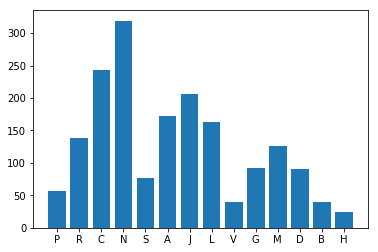

In [206]:
atc_level_distribution = dict(Counter(atc_level1))
plt.bar(atc_level_distribution.keys(), atc_level_distribution.values())

In [71]:
53456-2114

51342

In [72]:
all3.isnull().sum()

smiles           0
name             0
id               0
inchi_key        0
atc          51342
dtype: int64